<img alt="QuantRocket logo" src="https://www.quantrocket.com/assets/img/notebook-header-logo.png">

<a href="https://www.quantrocket.com/disclaimer/">Disclaimer</a>

# Moonshot Backtest With VIX Filter

The trading strategy implementation in `first_last.py` includes a `MIN_VIX` parameter, which, if set, applies the VIX filter from the previous notebook:

```python
if self.MIN_VIX:
    # Query VIX at 15:30 NY time (= close of 14:00:00 bar because VIX is Chicago time)
    vix = get_historical_prices("vix-30min", 
                                fields="Close", 
                                start_date=signals.index.min(), 
                                end_date=signals.index.max(), 
                                times="14:00:00")
    # extract VIX and squeeze single-column DataFrame to Series
    vix = vix.loc["Close"].xs("14:00:00", level="Time").squeeze()
    # reshape VIX like signals
    vix = signals.apply(lambda x: vix)
    signals = signals.where(vix >= self.MIN_VIX, 0)
```

Edit the parameter in the strategy file and re-run the backtest, or set it on-the-fly as shown below:

In [1]:
from quantrocket.moonshot import backtest
backtest("first-last", params={"MIN_VIX": 20}, filepath_or_buffer="first_last_vix_filter.csv")

And view the performance:

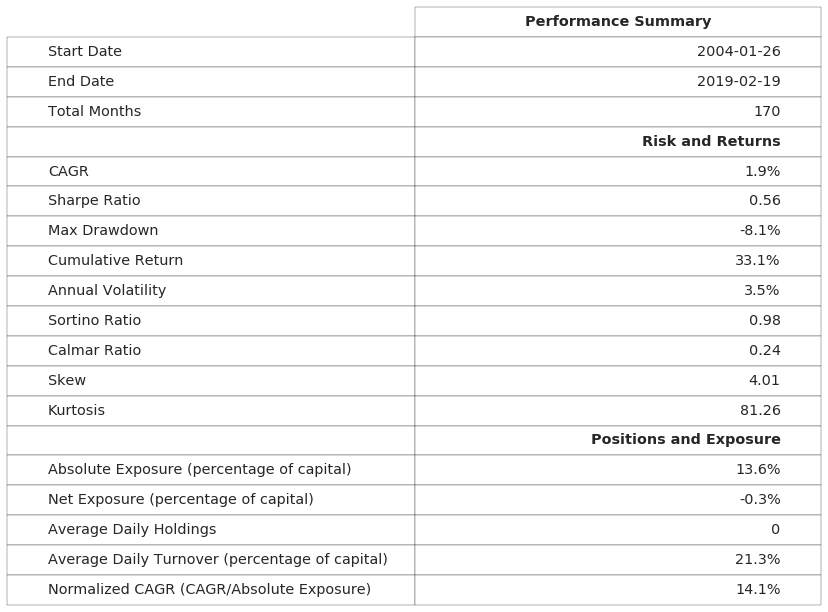

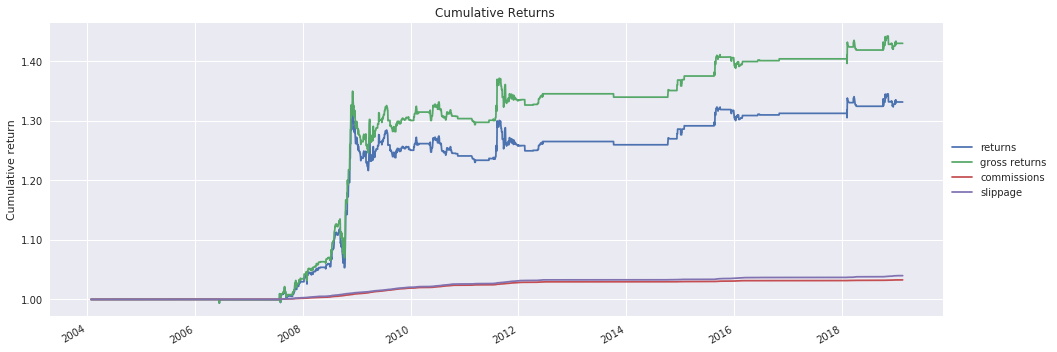

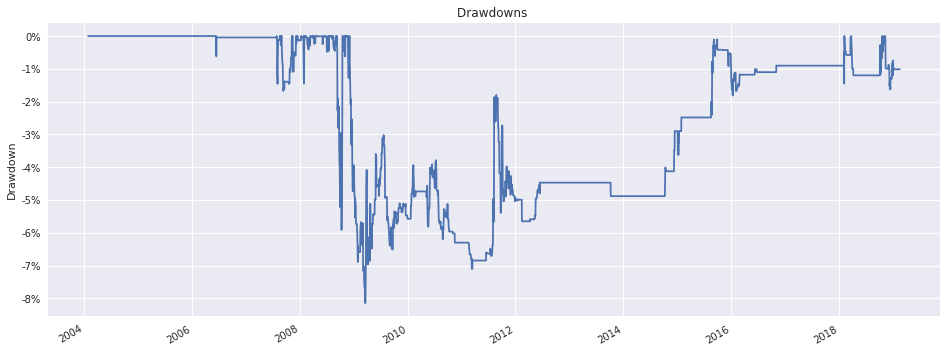

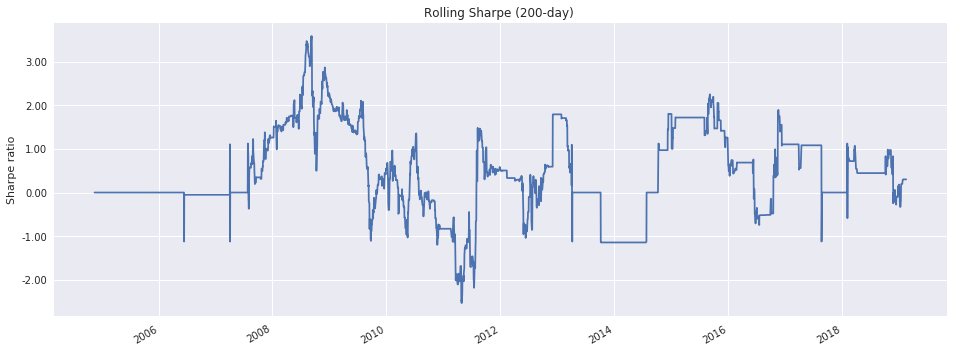

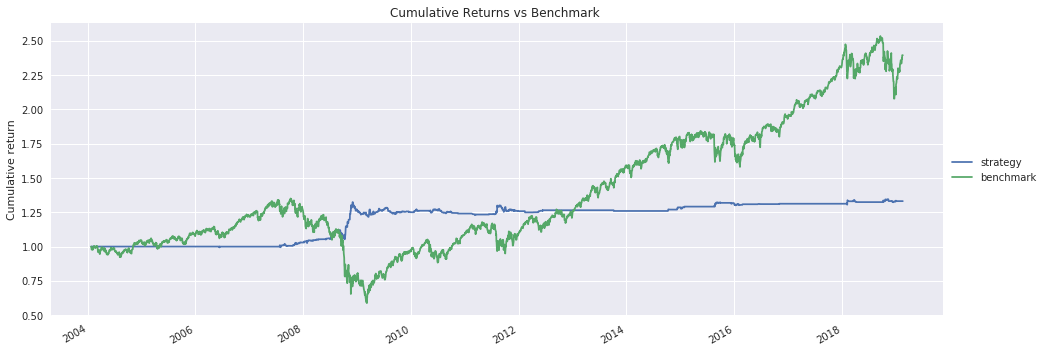

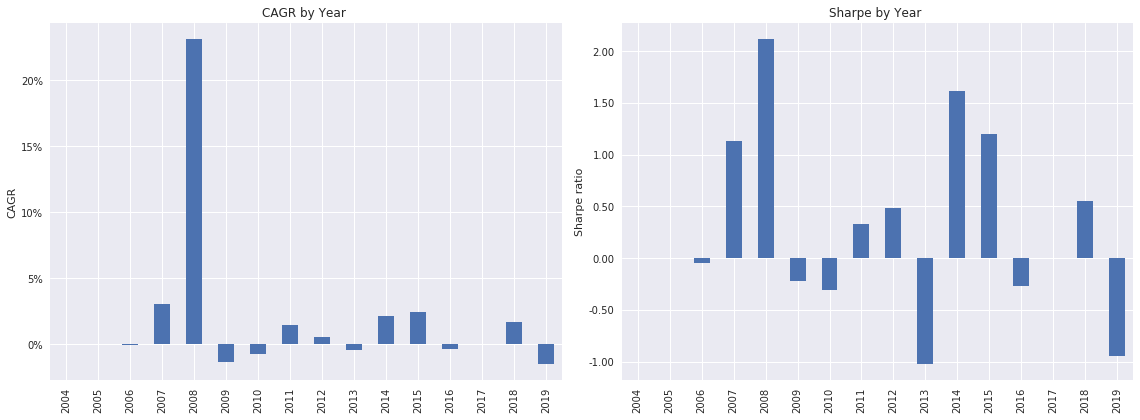

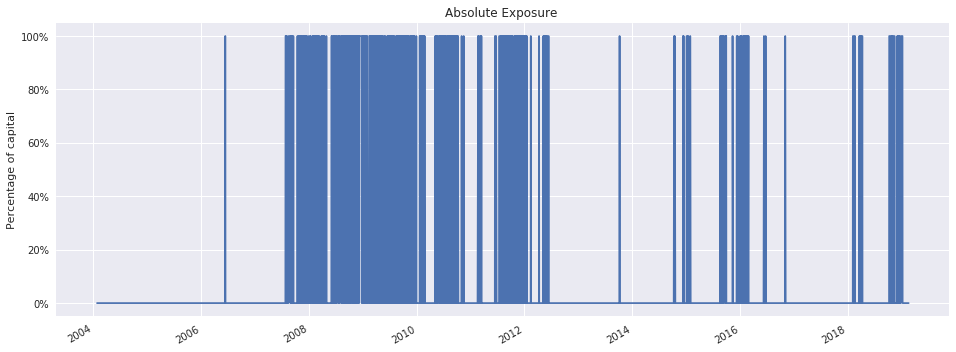

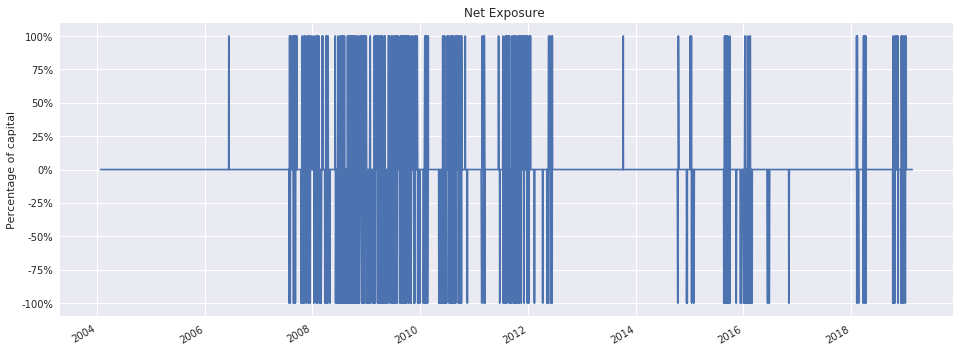

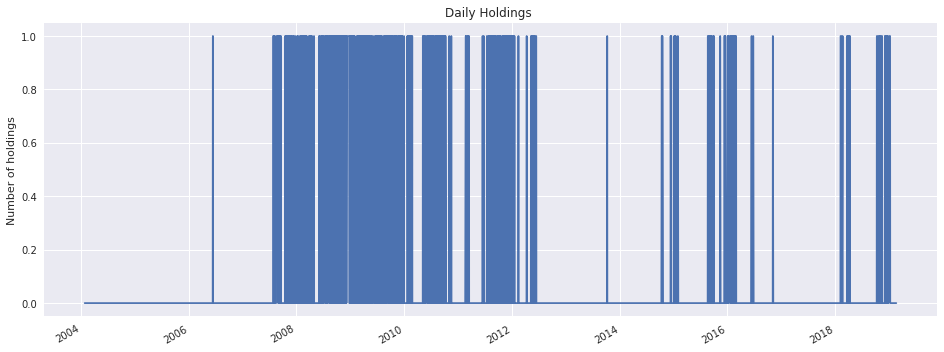

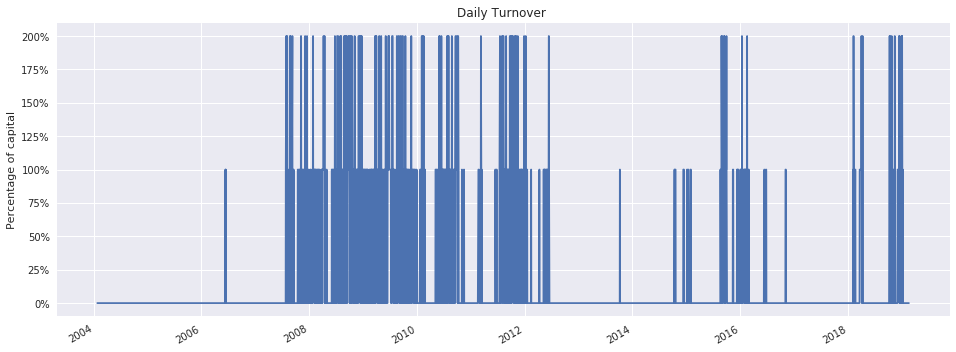

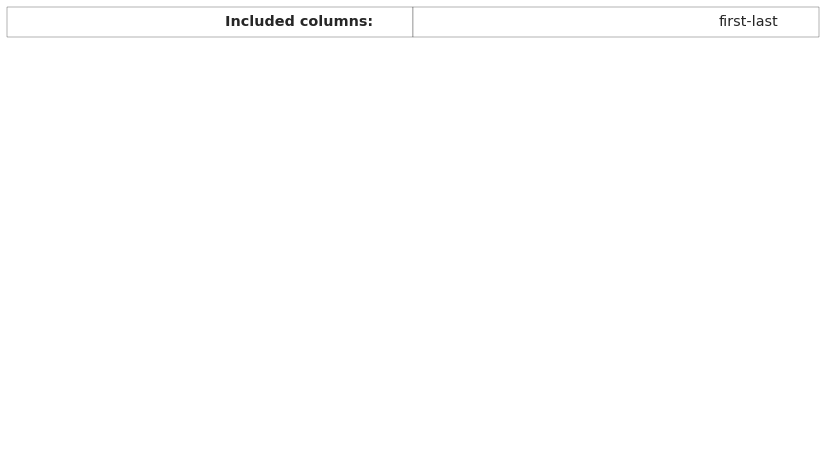

In [2]:
from moonchart import Tearsheet
Tearsheet.from_moonshot_csv("first_last_vix_filter.csv")

***

[Back to Introduction](Introduction.ipynb)